<a href="https://colab.research.google.com/github/amirrhseiin/Fraud-Detection/blob/main/by_identity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip 'drive/MyDrive/project3/Proj3(1).zip'

Archive:  drive/MyDrive/project3/Proj3(1).zip
   creating: Proj3/
  inflating: Proj3/test_identity.csv  
  inflating: Proj3/train_identity.csv  
  inflating: Proj3/sample_submission.csv  
  inflating: Proj3/train_transaction.csv  
  inflating: Proj3/test_transaction.csv  


In [ ]:
import pandas as pd
from keras.callbacks import ReduceLROnPlateau
from sklearn import preprocessing 
import numpy as np
import random
import matplotlib.pyplot as plt
from keras import Model
from keras.models import load_model
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D, Flatten, Dense, Dropout, Activation , Concatenate, Input , BatchNormalization
from keras.optimizers import SGD, Adam
from keras import Model
from keras.models import load_model
from keras.utils import to_categorical, plot_model
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
#sample_submission= pd.read_csv('Proj3/sample_submission.csv')
test_identity= pd.read_csv('Proj3/test_identity.csv')
test_transaction= pd.read_csv('Proj3/test_transaction.csv')
train_identity= pd.read_csv('Proj3/train_identity.csv')
raw_train_transaction=pd.read_csv('Proj3/train_transaction.csv')

In [ ]:
raw_train_datas = pd.merge(left= raw_train_transaction , right= train_identity , left_on='TransactionID', right_on='TransactionID')

In [ ]:
raw_train_datas

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,0,86535,15.000,H,2803,100.0,150.0,visa,226.0,debit,337.0,87.0,NaN,NaN,anonymous.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,0,86549,75.887,C,16496,352.0,117.0,mastercard,134.0,credit,NaN,NaN,NaN,NaN,gmail.com,gmail.com,1.0,4.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,83.000000,0.000000,...,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,0,86555,16.495,C,4461,375.0,185.0,mastercard,224.0,debit,NaN,NaN,NaN,30.0,hotmail.com,hotmail.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,...,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0,86620,30.000,H,1790,555.0,150.0,visa,226.0,debit,170.0,87.0,NaN,NaN,aol.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,26.000000,0.000000,...,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,3577521,0,15810802,48.877,C,12019,305.0,106.0,mastercard,224.0,debit,NaN,NaN,NaN,0.0,yahoo.fr,yahoo.fr,1.0,9.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.958333,0.958333,...,-15.0,145955.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,27.0,NaN,Found,Found,225.0,NaN,427.0,139.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 66.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,F3111 Build/33.3.A.1.97
144229,3577526,1,15810876,250.000,R,1214,174.0,150.0,visa,226.0,credit,272.0,87.0,NaN,NaN,gmail.com,gmail.com,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-5.0,172059.0,NaN,NaN,1.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,-300.0,New,NotFound,166.0,15.0,352.0,333.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.1.1,chrome 55.0 for android,32.0,855x480,match_status:2,T,F,T,F,mobile,A574BL Build/NMF26F
144230,3577529,0,15810912,73.838,C,5096,555.0,185.0,mastercard,137.0,credit,NaN,NaN,NaN,NaN,gmail.com,gmail.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,

In [ ]:
fraud_list=[]
for j,i in enumerate(raw_train_datas['isFraud']):
  if (i==1):
    fraud_list.append(j)

In [ ]:
len(fraud_list)

11318

In [ ]:
not_fraud_index_list=[i for i in range(144233)]
for i in fraud_list:
  not_fraud_index_list.remove(i)

In [ ]:
len(not_fraud_index_list)

132915

In [ ]:
selected_index =random.sample(not_fraud_index_list,len(fraud_list) )  

In [ ]:
notfruad_rows = raw_train_datas.iloc[selected_index]
fruad_rows = raw_train_datas.iloc[fraud_list]

In [ ]:
frames = [notfruad_rows ,fruad_rows]

In [ ]:
train_datas = pd.concat(frames)

In [ ]:
train_datas

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
1710,2995277,0,250763,200.000,H,12695,490.0,150.0,visa,226.0,debit,325.0,87.0,NaN,NaN,gmail.com,gmail.com,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-5.0,72279.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,-300.0,New,NotFound,166.0,15.0,529.0,549.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Windows 8,chrome 62.0,24.0,NaN,match_status:2,T,F,T,T,desktop,Windows
74124,3209261,0,5244944,50.000,S,11794,555.0,150.0,visa,226.0,debit,231.0,87.0,NaN,1.0,NaN,gmail.com,4.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,1.0,0.0,7.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,112.666664,0.666666,...,0.0,30764.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,Found,NaN,-300.0,Found,Found,166.0,12.0,542.0,107.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Linux,chrome 63.0,32.0,2961x1442,match_status:2,T,F,T,T,desktop,NaN
118368,3447742,0,11835100,20.000,S,15651,417.0,150.0,visa,226.0,debit,330.0,87.0,NaN,NaN,NaN,gmail.com,2.0,3.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,4.0,2.0,0.0,6.0,2.0,51.0,51.0,0.0,NaN,NaN,NaN,NaN,232.958328,0.958333,...,0.0,1139.0,0.0,0.0,1.0,-5.0,NaN,NaN,0.0,0.0,100.0,Found,NaN,-300.0,Found,Found,166.0,15.0,352.0,533.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Android 7.0,chrome 65.0 for android,24.0,2049x1536,match_status:2,T,F,T,T,mobile,P008 Build/NRD90M
102489,3367599,0,9512757,41.327,C,15885,545.0,185.0,visa,138.0,debit,NaN,NaN,NaN,NaN,gmail.com,gmail.com,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.083333,0.083333,...,-5.0,54631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 64.0,NaN,NaN,NaN,F,F,T,F,desktop,Windows
66408,3164718,0,3874431,20.580,C,11201,103.0,185.0,visa,226.0,debit,NaN,NaN,NaN,516.0,anonymous.com,anonymous.com,1.0,4.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,2.0,1.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.833332,0.833333,...,-5.0,137125.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,225.0,NaN,266.0,325.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 58.0,NaN,NaN,NaN,F,F,T,F,desktop,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144202,3577351,1,15807131,125.665,C,3289,176.0,185.0,mastercard,224.0,credit,NaN,NaN,NaN,NaN,gmail.com,gmail.com,2.0,2.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,...,-20.0,190267.0,NaN,NaN,-5.0,-20.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,417.0,612.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 66.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G610F Build/NRD90M
144203,3577354,1,15807171,125.665,C,14337,228.0,106.0,visa,137.0,debit,NaN,NaN,NaN,NaN,gmail.com,gmail.com,3.0,2.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,1.0,0.0,0.916666,0.916666,...,-25.0,229668.0,0.0,0.0,-5.0,-20.0,NaN,NaN,0.0,0.0,100.0,NotFound,27.0,NaN,Found,Found,225.0,15.0,417.0,612.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 66.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G610F Build/NRD90M
144204,3577364,1,15807516,69.964,C,5812,408.0,185.0,mastercard,224.0,debit,NaN,NaN,NaN,24.0,hotmail.com,hotmail.com,1.0,3.0,0.0,1.0,0.0,1.0,1.0,3.0,0.0,2.0,2.0,2.0,0.0,0.0,112.0,NaN,20.0,113.0,20.0,

In [ ]:
train_datas.drop(['TransactionID','ProductCD'],axis=1,inplace=True)

In [ ]:
drop_columns=[]
null_percent=train_datas.isnull().sum()*100/22636
for i,j in enumerate(null_percent):
  if(j>50):
    drop_columns.append(i)


In [ ]:
len(drop_columns)

90

In [ ]:
drop_columns_name=[]
for i in drop_columns:
  drop_columns_name.append(train_datas.columns[i])

In [ ]:
train_datas.drop(columns=drop_columns_name, inplace=True) 

In [ ]:
train_datas

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card4,card5,card6,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D4,D6,D8,D9,D10,D12,D13,D14,D15,M4,V12,V13,V14,V15,...,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_31,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
1710,0,250763,200.000,12695,490.0,150.0,visa,226.0,debit,gmail.com,gmail.com,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,-5.0,72279.0,NaN,NaN,1.0,0.0,NaN,NaN,100.0,NotFound,52.0,New,NotFound,166.0,529.0,549.0,New,NotFound,chrome 62.0,T,F,T,T,desktop,Windows
74124,0,5244944,50.000,11794,555.0,150.0,visa,226.0,debit,NaN,gmail.com,4.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,1.0,0.0,7.0,4.0,0.0,NaN,NaN,112.666664,0.666666,273.0,NaN,NaN,273.0,NaN,NaN,0.0,0.0,1.0,0.0,...,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,30764.0,0.0,0.0,1.0,0.0,0.0,0.0,100.0,Found,NaN,Found,Found,166.0,542.0,107.0,Found,Found,chrome 63.0,T,F,T,T,desktop,NaN
118368,0,11835100,20.000,15651,417.0,150.0,visa,226.0,debit,NaN,gmail.com,2.0,3.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,4.0,2.0,0.0,6.0,2.0,51.0,NaN,NaN,232.958328,0.958333,NaN,NaN,51.0,NaN,51.0,NaN,NaN,NaN,NaN,NaN,...,60.000000,30.0,30.0,60.0000,0.0,30.0,0.0000,60.0000,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1139.0,0.0,0.0,1.0,-5.0,0.0,0.0,100.0,Found,NaN,Found,Found,166.0,352.0,533.0,Found,Found,chrome 65.0 for android,T,F,T,T,mobile,P008 Build/NRD90M
102489,0,9512757,41.327,15885,545.0,185.0,visa,138.0,debit,gmail.com,gmail.com,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.083333,0.083333,0.0,0.0,0.0,0.0,0.0,M0,0.0,0.0,1.0,1.0,...,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,-5.0,54631.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,NotFound,52.0,Found,Found,225.0,176.0,507.0,Found,Found,chrome 64.0,F,F,T,F,desktop,Windows
66408,0,3874431,20.580,11201,103.0,185.0,visa,226.0,debit,anonymous.com,anonymous.com,1.0,4.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,2.0,1.0,23.0,23.0,23.0,23.833332,0.833333,0.0,23.0,23.0,0.0,23.0,M2,0.0,0.0,1.0,1.0,...,87.216797,0.0,0.0,29.3832,0.0,0.0,29.3832,29.3832,29.3832,0.0,57.833599,0.0,0.0,0.0,0.0,-5.0,137125.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,NotFound,52.0,Found,Found,225.0,266.0,325.0,Found,Found,chrome 58.0,F,F,T,F,desktop,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144202,1,15807131,125.665,3289,176.0,185.0,mastercard,224.0,credit,gmail.com,gmail.com,2.0,2.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,0.0,1.0,0.0,NaN,0.0,M2,0.0,0.0,1.0,1.0,...,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,-20.0,190267.0,NaN,NaN,-5.0,-20.0,NaN,NaN,100.0,NotFound,27.0,New,NotFound,225.0,417.0,612.0,New,NotFound,chrome 66.0 for android,F,F,T,F,mobile,SM-G610F Build/NRD90M
144203,1,15807171,125.665,14337,228.0,106.0,visa,137.0,debit,gmail.com,gmail.com,3.0,2.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,0.916666,0.916666,0.0,1.0,0.0,NaN,0.0,M2,0.0,0.0,1.0,1.0,...,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,-25.0,229668.0,0.0,0.0,-5.0,-20.0,0.0,0.0,100.0,NotFound,27.0,Found,Found,225.0,417.0,612.0,Found,Found,chrome 66.0 for android,F,F,T,F,mobile,SM-G610F Build/NRD90M
144204,1,15807516,69.964,5812,408.0,185.0,mastercard,224.0,debit,hotmail.com,hotmail.com,1.0,3.0,0.0,1.0,0.0,1.0,1.0,3.0,0.0,2.0,2.0,2.0,0.0,0.0,112.0,113.0,113.0,NaN,NaN,

In [ ]:
nulls_before = train_datas.isnull().sum()

nulls_before[nulls_before > 0]

card2          303
card3           26
card4           30
card5          141
card6           27
              ... 
id_36          378
id_37          378
id_38          378
DeviceType     407
DeviceInfo    4686
Length: 322, dtype: int64

In [ ]:
train_datas.fillna(train_datas.mean(), inplace=True)
train_datas

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card4,card5,card6,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D4,D6,D8,D9,D10,D12,D13,D14,D15,M4,V12,V13,V14,V15,...,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_31,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
1710,0,250763,200.000,12695,490.0,150.0,visa,226.0,debit,gmail.com,gmail.com,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.000000,50.143384,57.073393,95.572624,0.539703,11.946078,47.761321,11.793785,55.730534,40.145782,NaN,0.0,0.0,0.997871,0.897082,...,0.000000,0.0,0.0,0.0000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,-5.0,72279.0,0.101173,-0.123637,1.0,0.0,0.141008,-0.252053,100.0,NotFound,52.00000,New,NotFound,166.0,529.0,549.0,New,NotFound,chrome 62.0,T,F,T,T,desktop,Windows
74124,0,5244944,50.000,11794,555.0,150.0,visa,226.0,debit,NaN,gmail.com,4.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,1.0,0.0,7.0,4.0,0.000000,50.143384,57.073393,112.666664,0.666666,273.000000,47.761321,11.793785,273.000000,40.145782,NaN,0.0,0.0,1.000000,0.000000,...,0.000000,0.0,0.0,0.0000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,30764.0,0.000000,0.000000,1.0,0.0,0.000000,0.000000,100.0,Found,47.70168,Found,Found,166.0,542.0,107.0,Found,Found,chrome 63.0,T,F,T,T,desktop,NaN
118368,0,11835100,20.000,15651,417.0,150.0,visa,226.0,debit,NaN,gmail.com,2.0,3.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,4.0,2.0,0.0,6.0,2.0,51.000000,50.143384,57.073393,232.958328,0.958333,11.946078,47.761321,51.000000,55.730534,51.000000,NaN,0.0,0.0,0.997871,0.897082,...,60.000000,30.0,30.0,60.0000,0.0,30.0,0.000000,60.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1139.0,0.000000,0.000000,1.0,-5.0,0.000000,0.000000,100.0,Found,47.70168,Found,Found,166.0,352.0,533.0,Found,Found,chrome 65.0 for android,T,F,T,T,mobile,P008 Build/NRD90M
102489,0,9512757,41.327,15885,545.0,185.0,visa,138.0,debit,gmail.com,gmail.com,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,M0,0.0,0.0,1.000000,1.000000,...,0.000000,0.0,0.0,0.0000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,-5.0,54631.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,100.0,NotFound,52.00000,Found,Found,225.0,176.0,507.0,Found,Found,chrome 64.0,F,F,T,F,desktop,Windows
66408,0,3874431,20.580,11201,103.0,185.0,visa,226.0,debit,anonymous.com,anonymous.com,1.0,4.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,2.0,1.0,23.000000,23.000000,23.000000,23.833332,0.833333,0.000000,23.000000,23.000000,0.000000,23.000000,M2,0.0,0.0,1.000000,1.000000,...,87.216797,0.0,0.0,29.3832,0.0,0.0,29.383200,29.383200,29.383200,0.0,57.833599,0.0,0.0,0.0,0.0,-5.0,137125.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,100.0,NotFound,52.00000,Found,Found,225.0,266.0,325.0,Found,Found,chrome 58.0,F,F,T,F,desktop,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144202,1,15807131,125.665,3289,176.0,185.0,mastercard,224.0,credit,gmail.com,gmail.com,2.0,2.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,1.0,2.0,2.0,0.0,0.0,0.000000,1.000000,1.000000,95.572624,0.539703,0.000000,1.000000,0.000000,55.730534,0.000000,M2,0.0,0.0,1.000000,1.000000,...,0.000000,0.0,0.0,0.0000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,-20.0,190267.0,0.101173,-0.123637,-5.0,-20.0,0.141008,-0.252053,100.0,NotFound,27.00000,New,NotFound,225.0,417.0,612.0,New,NotFound,chrome 66.0 for android,F,F,T,F,mobile,SM-G610F Build/NRD90M
144203,1,15807171,125.665,14337,228.0,106.0,visa,137.0,debit,gmail.com,gmail.com,3.0,2.0,0.0,1.0,0.0,1

In [ ]:
nulls_after = train_datas.isnull().sum()
nulls_after[nulls_after > 0]

card4               30
card6               27
P_emaildomain     2013
R_emaildomain     1529
M4               10605
id_15              378
id_16             2368
id_28              382
id_29              382
id_31              479
id_35              378
id_36              378
id_37              378
id_38              378
DeviceType         407
DeviceInfo        4686
dtype: int64

In [ ]:
train_datas.card4.fillna(train_datas.card4.mode()[0] , inplace=True)
train_datas.card6.fillna(train_datas.card6.mode()[0] , inplace=True)
train_datas.P_emaildomain.fillna(train_datas.P_emaildomain.mode()[0] , inplace=True)
train_datas.R_emaildomain.fillna(train_datas.R_emaildomain.mode()[0] , inplace=True)
train_datas.M4.fillna(train_datas.M4.mode()[0] , inplace=True)
train_datas.id_15.fillna(train_datas.id_15.mode()[0] , inplace=True)
train_datas.id_16.fillna(train_datas.id_16.mode()[0] , inplace=True)
train_datas.id_28.fillna(train_datas.id_28.mode()[0] , inplace=True)
train_datas.id_29.fillna(train_datas.id_29.mode()[0] , inplace=True)
train_datas.id_31.fillna(train_datas.id_31.mode()[0] , inplace=True)
train_datas.id_35.fillna(train_datas.id_35.mode()[0] , inplace=True)
train_datas.id_36.fillna(train_datas.id_36.mode()[0] , inplace=True)
train_datas.id_37.fillna(train_datas.id_37.mode()[0] , inplace=True)
train_datas.id_38.fillna(train_datas.id_38.mode()[0] , inplace=True)
train_datas.DeviceType.fillna(train_datas.DeviceType.mode()[0] , inplace=True)
train_datas.DeviceInfo.fillna(train_datas.DeviceInfo.mode()[0] , inplace=True)



In [ ]:
nulls_after = train_datas.isnull().sum()
nulls_after[nulls_after > 0]

Series([], dtype: int64)

In [ ]:
train_datas = train_datas.sample(n=22636)   

In [ ]:
train_datas

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card4,card5,card6,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D4,D6,D8,D9,D10,D12,D13,D14,D15,M4,V12,V13,V14,V15,...,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_31,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
42859,0,2055857,25.000,2803,100.000000,150.0,visa,226.0,debit,gmail.com,gmail.com,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,50.143384,57.073393,49.791664,0.791666,11.946078,47.761321,11.793785,55.730534,40.145782,M2,0.0,0.0,0.997871,0.897082,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,-5.0,17451.000000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,100.000000,Found,52.0,Found,Found,166.000000,312.000000,222.000000,Found,Found,chrome 63.0,T,F,T,T,desktop,Windows
69223,1,4397975,34.280,9917,142.000000,185.0,visa,138.0,debit,hotmail.com,hotmail.com,1.0,7.0,0.0,2.0,0.0,2.0,2.0,2.0,0.0,3.0,3.0,3.0,3.0,1.0,23.0,0.000000,0.000000,0.875000,0.875000,0.000000,0.000000,0.000000,385.000000,0.000000,M2,0.0,0.0,1.000000,1.000000,...,235.823502,34.280399,0.000000,70.368103,0.000000,0.000000,24.835800,70.368103,24.835800,34.280399,165.455399,34.280399,0.0,0.0,0.0,-5.0,267284.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,NotFound,49.0,Found,Found,225.000000,290.000000,401.000000,Found,Found,chrome 63.0 for android,F,F,T,F,mobile,SM-J701M Build/NRD90M
28720,1,1680266,18.539,9633,296.000000,185.0,visa,138.0,debit,gmail.com,gmail.com,30.0,73.0,0.0,9.0,0.0,9.0,9.0,12.0,0.0,18.0,22.0,22.0,3.0,2.0,2.0,84.000000,84.000000,28.416666,0.416666,0.000000,84.000000,13.000000,13.000000,251.000000,M2,0.0,0.0,1.000000,1.000000,...,20.754801,20.754801,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.754801,20.754801,0.0,0.0,0.0,-10.0,205264.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,NotFound,20.0,Found,Found,225.000000,153.000000,563.000000,Found,Found,chrome 63.0 for android,F,F,T,T,mobile,F5121 Build/34.3.A.0.238
30717,1,1728089,75.498,16578,545.000000,185.0,visa,226.0,credit,hotmail.com,hotmail.com,2.0,3.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,2.0,1.0,1.0,2.0,2.0,0.0,398.000000,398.000000,1.000000,0.000000,0.000000,398.000000,0.000000,0.000000,398.000000,M0,0.0,0.0,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,-5.0,181702.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,NotFound,52.0,Found,Found,225.000000,266.000000,507.000000,Found,Found,chrome 63.0,F,F,T,T,desktop,Windows
30273,0,1719594,150.000,9803,583.000000,150.0,visa,226.0,credit,msn.com,msn.com,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,50.143384,57.073393,95.572624,0.539703,11.946078,47.761321,11.793785,55.730534,40.145782,M2,0.0,0.0,0.997871,0.897082,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,-45.0,66963.000000,0.101173,-0.123637,5.000000,-34.000000,0.141008,-0.252053,100.000000,NotFound,49.0,New,NotFound,166.000000,317.000000,214.000000,New,NotFound,mobile safari 11.0,T,F,F,T,mobile,iOS Device
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77083,1,5646410,26.343,15063,377.444051,150.0,visa,226.0,credit,anonymous.com,anonymous.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.000000,0.000000,95.572624,0.539703,0.000000,0.000000,0.000000,0.000000,0.000000,M2,0.0,0.0,1.000000,1.000000,..

In [ ]:
train_datas =train_datas.reset_index()   

In [ ]:
train_datas.drop('index', axis=1, inplace=True)

In [ ]:
train_datas

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card4,card5,card6,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D4,D6,D8,D9,D10,D12,D13,D14,D15,M4,V12,V13,V14,V15,...,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_31,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,0,2055857,25.000,2803,100.000000,150.0,visa,226.0,debit,gmail.com,gmail.com,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,50.143384,57.073393,49.791664,0.791666,11.946078,47.761321,11.793785,55.730534,40.145782,M2,0.0,0.0,0.997871,0.897082,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,-5.0,17451.000000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,100.000000,Found,52.0,Found,Found,166.000000,312.000000,222.000000,Found,Found,chrome 63.0,T,F,T,T,desktop,Windows
1,1,4397975,34.280,9917,142.000000,185.0,visa,138.0,debit,hotmail.com,hotmail.com,1.0,7.0,0.0,2.0,0.0,2.0,2.0,2.0,0.0,3.0,3.0,3.0,3.0,1.0,23.0,0.000000,0.000000,0.875000,0.875000,0.000000,0.000000,0.000000,385.000000,0.000000,M2,0.0,0.0,1.000000,1.000000,...,235.823502,34.280399,0.000000,70.368103,0.000000,0.000000,24.835800,70.368103,24.835800,34.280399,165.455399,34.280399,0.0,0.0,0.0,-5.0,267284.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,NotFound,49.0,Found,Found,225.000000,290.000000,401.000000,Found,Found,chrome 63.0 for android,F,F,T,F,mobile,SM-J701M Build/NRD90M
2,1,1680266,18.539,9633,296.000000,185.0,visa,138.0,debit,gmail.com,gmail.com,30.0,73.0,0.0,9.0,0.0,9.0,9.0,12.0,0.0,18.0,22.0,22.0,3.0,2.0,2.0,84.000000,84.000000,28.416666,0.416666,0.000000,84.000000,13.000000,13.000000,251.000000,M2,0.0,0.0,1.000000,1.000000,...,20.754801,20.754801,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.754801,20.754801,0.0,0.0,0.0,-10.0,205264.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,NotFound,20.0,Found,Found,225.000000,153.000000,563.000000,Found,Found,chrome 63.0 for android,F,F,T,T,mobile,F5121 Build/34.3.A.0.238
3,1,1728089,75.498,16578,545.000000,185.0,visa,226.0,credit,hotmail.com,hotmail.com,2.0,3.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,2.0,1.0,1.0,2.0,2.0,0.0,398.000000,398.000000,1.000000,0.000000,0.000000,398.000000,0.000000,0.000000,398.000000,M0,0.0,0.0,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,-5.0,181702.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,NotFound,52.0,Found,Found,225.000000,266.000000,507.000000,Found,Found,chrome 63.0,F,F,T,T,desktop,Windows
4,0,1719594,150.000,9803,583.000000,150.0,visa,226.0,credit,msn.com,msn.com,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,50.143384,57.073393,95.572624,0.539703,11.946078,47.761321,11.793785,55.730534,40.145782,M2,0.0,0.0,0.997871,0.897082,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,-45.0,66963.000000,0.101173,-0.123637,5.000000,-34.000000,0.141008,-0.252053,100.000000,NotFound,49.0,New,NotFound,166.000000,317.000000,214.000000,New,NotFound,mobile safari 11.0,T,F,F,T,mobile,iOS Device
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22631,1,5646410,26.343,15063,377.444051,150.0,visa,226.0,credit,anonymous.com,anonymous.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.000000,0.000000,95.572624,0.539703,0.000000,0.000000,0.000000,0.000000,0.000000,M2,0.0,0.0,1.000000,1.000000,...,0.000000,0.000000,

In [ ]:
train_datas.select_dtypes(include=['object'])

,card4,card6,P_emaildomain,R_emaildomain,M4,id_12,id_15,id_16,id_28,id_29,id_31,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,visa,debit,gmail.com,gmail.com,M2,Found,Found,Found,Found,Found,chrome 63.0,T,F,T,T,desktop,Windows
1,visa,debit,hotmail.com,hotmail.com,M2,NotFound,Found,Found,Found,Found,chrome 63.0 for android,F,F,T,F,mobile,SM-J701M Build/NRD90M
2,visa,debit,gmail.com,gmail.com,M2,NotFound,Found,Found,Found,Found,chrome 63.0 for android,F,F,T,T,mobile,F5121 Build/34.3.A.0.238
3,visa,credit,hotmail.com,hotmail.com,M0,NotFound,Found,Found,Found,Found,chrome 63.0,F,F,T,T,desktop,Windows
4,visa,credit,msn.com,msn.com,M2,NotFound,New,NotFound,New,NotFound,mobile safari 11.0,T,F,F,T,mobile,iOS Device
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22631,visa,credit,anonymous.com,anonymous.com,M2,NotFound,New,NotFound,New,NotFound,chrome 64.0 for android,F,F,T,F,mobile,hi6210sft Build/MRA58K
22632,mastercard,credit,gmail.com,gmail.com,M2,NotFound,Found,Found,Found,Found,chrome 65.0 for android,F,F,T,F,mobile,HTC U11 Build/NMF26X
22633,mastercard,debit,gmail.com,gmail.com,M2,NotFound,New,NotFound,New,NotFound,safari generic,T,F,F,F,desktop,MacOS
22634,visa,credit,anonymous.com,anonymous.com,M2,NotFound,New,NotFound,Found,Found,chrome 66.0,T,F,T,T,desktop,Windows


In [ ]:
label_encoder = preprocessing.LabelEncoder()

new_card4 = pd.Series(label_encoder.fit_transform(train_datas.card4))
new_card6 = pd.Series(label_encoder.fit_transform(train_datas.card6))
new_P_emaildomain = pd.Series(label_encoder.fit_transform(train_datas.P_emaildomain))
new_R_emaildomain= pd.Series(label_encoder.fit_transform(train_datas.R_emaildomain))
new_M4 = pd.Series(label_encoder.fit_transform(train_datas.M4))
new_id_12 = pd.Series(label_encoder.fit_transform(train_datas.id_12))
new_id_15 = pd.Series(label_encoder.fit_transform(train_datas.id_15))
new_id_16 = pd.Series(label_encoder.fit_transform(train_datas.id_16))
new_id_28 = pd.Series(label_encoder.fit_transform(train_datas.id_28))
new_id_29 = pd.Series(label_encoder.fit_transform(train_datas.id_29))
new_id_31 = pd.Series(label_encoder.fit_transform(train_datas.id_31))
new_id_35 = pd.Series(label_encoder.fit_transform(train_datas.id_35))
new_id_36 = pd.Series(label_encoder.fit_transform(train_datas.id_36))
new_id_37 = pd.Series(label_encoder.fit_transform(train_datas.id_37))
new_id_38 = pd.Series(label_encoder.fit_transform(train_datas.id_38))
new_DeviceType = pd.Series(label_encoder.fit_transform(train_datas.DeviceType))
new_DeviceInfo =pd.Series(label_encoder.fit_transform(train_datas.DeviceInfo))   	



In [ ]:
train_datas.drop(['R_emaildomain','P_emaildomain','M4','card6','card4','id_12','id_15','id_16',
                  'id_28','id_29','id_31','id_35','id_36','id_37','id_38','DeviceType','DeviceInfo'],axis=1, inplace=True)

In [ ]:
col_names=[]
col_names = train_datas.columns
col_names

Index(['isFraud', 'TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3',
       'card5', 'C1', 'C2', 'C3',
       ...
       'id_04', 'id_05', 'id_06', 'id_09', 'id_10', 'id_11', 'id_13', 'id_17',
       'id_19', 'id_20'],
      dtype='object', length=325)

In [ ]:
col_name_list=col_names.tolist()
col_name_list.append('R_emaildomain')
col_name_list.append('P_emaildomain')
col_name_list.append('M4')
col_name_list.append('card6')
col_name_list.append('card4')
col_name_list.append('id_12')
col_name_list.append('id_15')
col_name_list.append('id_16')
col_name_list.append('id_28')
col_name_list.append('id_29')
col_name_list.append('id_31')
col_name_list.append('id_35')
col_name_list.append('id_36')
col_name_list.append('id_37')
col_name_list.append('id_38')
col_name_list.append('DeviceType')
col_name_list.append('DeviceInfo')

In [ ]:
len(col_name_list)

342

In [ ]:
train_datas =pd.concat([train_datas,new_R_emaildomain,new_P_emaildomain,new_M4,new_card6,new_card4,new_id_12,new_id_15,new_id_16,new_id_28,new_id_29
                        ,new_id_31,new_id_35,new_id_36,new_id_37,new_id_38,new_DeviceType,new_DeviceInfo],axis=1)

In [ ]:
train_datas.columns = col_name_list
train_datas

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D4,D6,D8,D9,D10,D12,D13,D14,D15,V12,V13,V14,V15,V16,V17,V18,V19,V20,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_13,id_17,id_19,id_20,R_emaildomain,P_emaildomain,M4,card6,card4,id_12,id_15,id_16,id_28,id_29,id_31,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,0,2055857,25.000,2803,100.000000,150.0,226.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,50.143384,57.073393,49.791664,0.791666,11.946078,47.761321,11.793785,55.730534,40.145782,0.0,0.0,0.997871,0.897082,0.904259,1.058596,1.072555,0.9403,0.947713,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,-5.0,17451.000000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,100.000000,52.0,166.000000,312.000000,222.000000,16,16,2,2,3,0,0,0,0,0,40,1,0,1,1,0,724
1,1,4397975,34.280,9917,142.000000,185.0,138.0,1.0,7.0,0.0,2.0,0.0,2.0,2.0,2.0,0.0,3.0,3.0,3.0,3.0,1.0,23.0,0.000000,0.000000,0.875000,0.875000,0.000000,0.000000,0.000000,385.000000,0.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,...,0.000000,24.835800,70.368103,24.835800,34.280399,165.455399,34.280399,0.0,0.0,0.0,-5.0,267284.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,49.0,225.000000,290.000000,401.000000,19,19,2,2,3,1,0,0,0,0,41,0,0,1,0,1,640
2,1,1680266,18.539,9633,296.000000,185.0,138.0,30.0,73.0,0.0,9.0,0.0,9.0,9.0,12.0,0.0,18.0,22.0,22.0,3.0,2.0,2.0,84.000000,84.000000,28.416666,0.416666,0.000000,84.000000,13.000000,13.000000,251.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,20.754801,20.754801,0.0,0.0,0.0,-10.0,205264.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,20.0,225.000000,153.000000,563.000000,16,16,2,2,3,1,0,0,0,0,41,0,0,1,1,1,115
3,1,1728089,75.498,16578,545.000000,185.0,226.0,2.0,3.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,2.0,1.0,1.0,2.0,2.0,0.0,398.000000,398.000000,1.000000,0.000000,0.000000,398.000000,0.000000,0.000000,398.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,-5.0,181702.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,52.0,225.000000,266.000000,507.000000,19,19,0,1,3,1,0,0,0,0,40,0,0,1,1,0,724
4,0,1719594,150.000,9803,583.000000,150.0,226.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,50.143384,57.073393,95.572624,0.539703,11.946078,47.761321,11.793785,55.730534,40.145782,0.0,0.0,0.997871,0.897082,0.904259,1.058596,1.072555,0.9403,0.947713,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,-45.0,66963.000000,0.101173,-0.123637,5.000000,-34.000000,0.141008,-0.252053,100.000000,49.0,166.000000,317.000000,214.000000,31,31,2,1,3,1,1,1,1,1,83,1,0,0,1,1,788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22631,1,5646410,26.343,15063,377.444051,150.0,226.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.000000,0.000000,95.572624,0.539703,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,-50.0,155458.000000,0.101173,-0.123637,1.000000,-9.000000,0.141008,-0.252053,100.000000,49.0,225.000000,384.000000,561.000000,1,1,2,1,3,1,1,1,1,1,44,0,0,1,0,1,787
22632,0,10051838,17.643,3611,500.000000,185.0,224.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,1.0,0.0,50.143384,57.073393,0.333333,0.333333,0.000000,0.000000,0.000000,55.730534,0

In [ ]:
maxlist=[]
maxlist = train_datas.max()

for i in range(len(train_datas.columns)):
  train_datas.iloc[:,i]=train_datas.iloc[:,i]/maxlist[i]

In [ ]:
train_label= train_datas.isFraud
train_datas.drop('isFraud', axis=1,inplace=True)

In [ ]:
train_datas

,TransactionDT,TransactionAmt,card1,card2,card3,card5,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D4,D6,D8,D9,D10,D12,D13,D14,D15,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_13,id_17,id_19,id_20,R_emaildomain,P_emaildomain,M4,card6,card4,id_12,id_15,id_16,id_28,id_29,id_31,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,0.130028,0.013889,0.152528,0.166667,0.649351,0.953586,0.000428,0.000178,0.0,0.000446,NaN,0.000446,0.000000,0.000301,NaN,0.000308,0.000315,0.000000,0.000344,0.000706,0.000000,0.058036,0.066442,0.038429,0.826087,0.013988,0.076053,0.013924,0.065798,0.046465,NaN,NaN,0.997871,0.128155,0.064590,0.070573,0.071504,0.134329,0.067694,0.242232,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,-inf,0.017467,0.000000,NaN,0.000000,-inf,0.000000,NaN,1.00000,0.812500,0.734513,0.466368,0.336364,0.271186,0.275862,1.0,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.360360,1.0,0.0,1.0,1.0,0.0,0.882927
1,0.278161,0.019044,0.539642,0.236667,0.800866,0.582278,0.000214,0.001245,0.0,0.000893,NaN,0.000893,0.000892,0.000603,NaN,0.000925,0.000946,0.000946,0.001033,0.000706,0.035937,0.000000,0.000000,0.000675,0.913044,0.000000,0.000000,0.000000,0.454545,0.000000,NaN,NaN,1.000000,0.142857,0.071429,0.066667,0.066667,0.142857,0.071429,0.250000,...,0.000000,0.012418,0.031275,0.011038,0.00037,0.001235,0.000351,0.0,0.0,0.0,-inf,0.267532,0.000000,NaN,0.000000,NaN,0.000000,NaN,1.00000,0.765625,0.995575,0.433483,0.607576,0.322034,0.327586,1.0,1.0,1.000000,1.0,0.0,0.0,0.0,0.0,0.369369,0.0,0.0,1.0,0.0,1.0,0.780488
2,0.106273,0.010299,0.524188,0.493333,0.800866,0.582278,0.006427,0.012980,0.0,0.004018,NaN,0.004018,0.004014,0.003618,NaN,0.005549,0.006940,0.006940,0.001033,0.001411,0.003125,0.097222,0.097788,0.021932,0.434782,0.000000,0.133758,0.015348,0.015348,0.290509,NaN,NaN,1.000000,0.142857,0.071429,0.066667,0.066667,0.142857,0.071429,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000155,0.000213,0.0,0.0,0.0,-inf,0.205454,0.000000,NaN,0.000000,NaN,0.000000,NaN,1.00000,0.312500,0.995575,0.228700,0.853030,0.271186,0.275862,1.0,1.0,1.000000,1.0,0.0,0.0,0.0,0.0,0.369369,0.0,0.0,1.0,1.0,1.0,0.140244
3,0.109297,0.041943,0.902106,0.908333,0.800866,0.953586,0.000428,0.000533,0.0,0.000446,NaN,0.000446,0.000446,0.000603,NaN,0.000617,0.000315,0.000315,0.000689,0.001411,0.000000,0.460648,0.463329,0.000772,0.000000,0.000000,0.633758,0.000000,0.000000,0.460648,NaN,NaN,1.000000,0.142857,0.071429,0.066667,0.066667,0.142857,0.071429,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,-inf,0.181870,0.000000,NaN,0.000000,NaN,0.000000,NaN,1.00000,0.812500,0.995575,0.397608,0.768182,0.322034,0.327586,0.0,0.5,1.000000,1.0,0.0,0.0,0.0,0.0,0.360360,0.0,0.0,1.0,1.0,0.0,0.882927
4,0.108760,0.083333,0.533439,0.971667,0.649351,0.953586,0.000214,0.000178,0.0,0.000446,NaN,0.000446,0.000000,0.000301,NaN,0.000308,0.000315,0.000000,0.000344,0.000706,0.000000,0.058036,0.066442,0.073763,0.563168,0.013988,0.076053,0.013924,0.065798,0.046465,NaN,NaN,0.997871,0.128155,0.064590,0.070573,0.071504,0.134329,0.067694,0.242232,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,-inf,0.067025,0.014453,-inf,0.096154,-inf,0.009401,-inf,1.00000,0.765625,0.734513,0.473842,0.324242,0.525424,0.534483,1.0,0.5,1.000000,1.0,0.5,1.0,1.0,1.0,0.747748,1.0,0.0,0.0,1.0,1.0,0.960976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22631,0.357122,0.014635,0.819666,0.629073,0.649351,0.953586,0.000214,0.000178,0.0,0.000446,NaN,0.000446,0.000446,0.000301,NaN,0.000308,0.000315,0.000315,0.000000,0.000000,0.000000,0.000000,0.000000,0.073763,0.5

test data

In [ ]:
test_datas = pd.merge(left=test_transaction,  right= test_identity , left_on='TransactionID', right_on='TransactionID')

In [ ]:
test_datas

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,id-10,id-11,id-12,id-13,id-14,id-15,id-16,id-17,id-18,id-19,id-20,id-21,id-22,id-23,id-24,id-25,id-26,id-27,id-28,id-29,id-30,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663586,18404013,6.271,C,15885,545.0,185.0,visa,138.0,debit,NaN,NaN,NaN,NaN,hotmail.com,hotmail.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,...,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,18404055,50.000,S,2453,399.0,150.0,american express,137.0,credit,494.0,87.0,NaN,37.0,NaN,gmail.com,4.0,8.0,0.0,4.0,0.0,0.0,0.0,25.0,0.0,30.0,5.0,0.0,57.0,4.0,34.0,34.0,1.0,NaN,NaN,634.0,1.0,22.000000,0.000000,458.0,...,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,Found,NaN,-300.0,Found,Found,166.0,NaN,542.0,368.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Android 6.0.1,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,18404235,37.318,C,15885,545.0,185.0,visa,138.0,debit,NaN,NaN,NaN,NaN,anonymous.com,anonymous.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,...,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,-360.0,New,NotFound,225.0,NaN,271.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663601,18404315,6.271,C,15885,545.0,185.0,visa,138.0,debit,NaN,NaN,NaN,NaN,hotmail.com,hotmail.com,2.0,4.0,0.0,3.0,0.0,3.0,3.0,3.0,0.0,3.0,3.0,3.0,2.0,1.0,NaN,NaN,0.0,567.0,288.0,567.0,288.0,0.000000,0.000000,0.0,...,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,27.0,NaN,Found,Found,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,18404359,52.258,C,9633,130.0,185.0,visa,138.0,debit,NaN,NaN,NaN,NaN,hotmail.com,hotmail.com,8.0,21.0,0.0,4.0,0.0,4.0,4.0,5.0,0.0,6.0,11.0,11.0,10.0,6.0,NaN,NaN,NaN,316.0,2.0,316.0,2.0,NaN,NaN,0.0,...,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,567.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141902,4170230,34214253,10.452,C,5812,408.0,185.0,mastercard,224.0,debit,NaN,NaN,NaN,NaN,gmail.com,gmail.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,...,-20.0,473365.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,NaN,153.0,325.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 71.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-J700M
141903,4170233,34214271,13.403,C,3154,408.0,185.0,mastercard,224.0,debit,NaN,NaN,NaN,7.0,hotmail.com,hotmail.com,1.0,2.0,0.0,2.0,0.0,2.0,2.0,1.0,0.0,2.0,1.0,1.0,2.0,1.0,373.0,373.0,1.0,0.0,NaN,0.0,NaN,373.958344,0.958333,0.0,...,-5.0,489917.0,0.0,0.0,-4.0,-32.0,NaN,NaN,0.0,0.0,100.0,NotFound,27.0,NaN,Found,Found,225.0,17.0,417.0,595.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 71.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-J320M
141904,4170234,34214277,50.000,H,9002,453.0,150.0,visa,226.0,debit,433.0,87.0,NaN,NaN,yahoo.com,yahoo.com,1.0,1.0,0.0,1.0,0.0,1.

In [ ]:
test_col_names = test_datas.columns.tolist()
test_drop_col_name =[]

for name in test_col_names:
  if name not in col_name_list:
    test_drop_col_name.append(name)

In [ ]:
len(test_drop_col_name)

115

In [ ]:
test_drop_col_name

['TransactionID',
 'ProductCD',
 'addr1',
 'addr2',
 'dist1',
 'dist2',
 'D2',
 'D3',
 'D5',
 'D7',
 'D11',
 'M1',
 'M2',
 'M3',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V138',
 'V139',
 'V140',
 'V141',
 'V142',
 'V143',
 'V144',
 'V145',
 'V146',
 'V147',
 'V148',
 'V149',
 'V150',
 'V151',
 'V152',
 'V153',
 'V154',
 'V155',
 'V156',
 'V157',
 'V158',
 'V159',
 'V160',
 'V161',
 'V162',
 'V163',
 'V164',
 'V165',
 'V166',
 'V322',
 'V323',
 'V324',
 'V325',
 'V326',
 'V327',
 'V328',
 'V329',
 'V330',
 'V331',
 'V332',
 'V333',
 'V334',
 'V335',
 'V336',
 'V337',
 'V338',
 'V339',
 'id-01',
 'id-02',
 'id-03',
 'id-04',
 'id-05',
 'id-06',
 'id-07',
 'id-08',
 'id-09',
 'id-10',
 'id-11',
 'id-12',
 'id-13',
 'id-14',
 'id-15',
 'id-16',
 'id-17',
 'id-18',
 'id-19',
 'id-20',
 'id-21',
 'id-22',
 'id-23',
 'id-24',
 'id-25',
 'id-26',
 'id-27',
 'id-28',
 'id-29',
 'id-30',
 'id-31',
 'id-32',
 'id-33',
 'id

In [ ]:
test_drop_col_name.remove('id-01')
test_drop_col_name.remove('id-02')
test_drop_col_name.remove('id-03')
test_drop_col_name.remove('id-04')
test_drop_col_name.remove('id-05')
test_drop_col_name.remove('id-06')
test_drop_col_name.remove('id-09')
test_drop_col_name.remove('id-10')
test_drop_col_name.remove('id-11')
test_drop_col_name.remove('id-12')
test_drop_col_name.remove('id-13')
test_drop_col_name.remove('id-15')
test_drop_col_name.remove('id-16')
test_drop_col_name.remove('id-17')
test_drop_col_name.remove('id-19')
test_drop_col_name.remove('id-20')
test_drop_col_name.remove('id-28')
test_drop_col_name.remove('id-29')
test_drop_col_name.remove('id-31')
test_drop_col_name.remove('id-35')
test_drop_col_name.remove('id-36')
test_drop_col_name.remove('id-37')
test_drop_col_name.remove('id-38')



In [ ]:
len(test_drop_col_name)

92

In [ ]:
test_datas.drop (columns=test_drop_col_name , inplace=True)

In [ ]:
test_datas

,TransactionDT,TransactionAmt,card1,card2,card3,card4,card5,card6,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D4,D6,D8,D9,D10,D12,D13,D14,D15,M4,V12,V13,V14,V15,V16,...,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,id-01,id-02,id-03,id-04,id-05,id-06,id-09,id-10,id-11,id-12,id-13,id-15,id-16,id-17,id-19,id-20,id-28,id-29,id-31,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,18404013,6.271,15885,545.0,185.0,visa,138.0,debit,hotmail.com,hotmail.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,M2,0.0,0.0,1.0,1.0,1.0,...,0.0000,0.0000,0.0,0.0000,0.0,0.0000,NaN,NaN,NaN,0.0,0.0,0.0,0.000,0.000,0.000,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,100.0,NotFound,27.0,New,NotFound,225.0,427.0,563.0,New,NotFound,chrome 67.0 for android,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,18404055,50.000,2453,399.0,150.0,american express,137.0,credit,NaN,gmail.com,4.0,8.0,0.0,4.0,0.0,0.0,0.0,25.0,0.0,30.0,5.0,0.0,57.0,4.0,34.0,NaN,634.0,22.000000,0.000000,458.0,NaN,NaN,NaN,634.0,NaN,0.0,0.0,1.0,0.0,0.0,...,270.0000,90.0000,0.0,270.0000,0.0,90.0000,60.0000,310.0000,130.0000,0.0,0.0,0.0,0.000,0.000,0.000,0.0,3579.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,Found,NaN,Found,Found,166.0,542.0,368.0,Found,Found,chrome 67.0 for android,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,18404235,37.318,15885,545.0,185.0,visa,138.0,debit,anonymous.com,anonymous.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,M2,0.0,0.0,1.0,1.0,1.0,...,0.0000,0.0000,0.0,0.0000,0.0,0.0000,NaN,NaN,NaN,0.0,0.0,0.0,0.000,0.000,0.000,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,100.0,NotFound,52.0,New,NotFound,225.0,271.0,507.0,New,NotFound,ie 11.0 for tablet,F,T,T,F,desktop,Trident/7.0
3,18404315,6.271,15885,545.0,185.0,visa,138.0,debit,hotmail.com,hotmail.com,2.0,4.0,0.0,3.0,0.0,3.0,3.0,3.0,0.0,3.0,3.0,3.0,2.0,1.0,NaN,567.0,567.0,0.000000,0.000000,0.0,567.0,0.0,0.0,0.0,M2,0.0,0.0,1.0,1.0,1.0,...,6.2710,6.2710,0.0,0.0000,0.0,0.0000,NaN,NaN,NaN,0.0,0.0,0.0,6.271,6.271,6.271,-45.0,252944.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,NotFound,27.0,Found,Found,225.0,427.0,563.0,Found,Found,chrome 67.0 for android,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,18404359,52.258,9633,130.0,185.0,visa,138.0,debit,hotmail.com,hotmail.com,8.0,21.0,0.0,4.0,0.0,4.0,4.0,5.0,0.0,6.0,11.0,11.0,10.0,6.0,NaN,316.0,316.0,NaN,NaN,0.0,316.0,0.0,NaN,12.0,M2,0.0,0.0,1.0,1.0,1.0,...,0.0000,0.0000,0.0,0.0000,0.0,0.0000,NaN,NaN,NaN,0.0,0.0,0.0,0.000,0.000,0.000,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,100.0,NotFound,27.0,New,NotFound,225.0,567.0,507.0,New,NotFound,chrome 67.0 for android,F,F,T,F,mobile,SM-G9650 Build/R16NW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141902,34214253,10.452,5812,408.0,185.0,mastercard,224.0,debit,gmail.com,gmail.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,M2,0.0,0.0,1.0,1.0,1.0,...,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.000,0.000,0.000,-20.0,473365.0,NaN,NaN,0.0,0.0,NaN,NaN,100.0,NotFound,27.0,New,NotFound,225.0,153.0,325.0,New,NotFound,chrome 71.0 for android,F,F,T,F,mobile,SM-J700M
141903,34214271,13.403,3154,408.0,185.0,mastercard,224.0,debit,hotmail.com,hotmail.com,1.0,2.0,0.0,2.0,0.0,2.0,2.0,1.0,0.0,2.0,1.0,1.0,2.0,1.0,373.0,0.0,0.0,373.958344,0.958333,0.0,0.0,373.0,NaN,1.0,M2,0.0,0.0,1.0,1.0,1.0,...,13.4026,13.4026,0.0,13.4026,0.0,13.4026,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.000,0.000,0.000,-5.0,489917.0,0.0,0.0,-4.0,-32.0,0.0,0.0,100.0,NotFound,27.0,Found,Found,225.0,417.0,595.0,Found,Found,chrome 71.0 for android,F,F,T,F,mobile,SM-J320M
141904,34214277,50.000,9002,453.0,150.0,visa,226.0,debi

In [ ]:
test_datas.fillna(test_datas.mean(), inplace=True)

In [ ]:
nulls_after = test_datas.isnull().sum()
nulls_after[nulls_after > 0]

card4             1158
card6             1080
P_emaildomain    11660
R_emaildomain     9797
M4               76280
id-15             4930
id-16            16160
id-28             5129
id-29             5129
id-31             5282
id-35             4930
id-36             4930
id-37             4930
id-38             4930
DeviceType        4976
DeviceInfo       26850
dtype: int64

In [ ]:
test_datas.card4.fillna(test_datas.card4.mode()[0] , inplace=True)
test_datas.card6.fillna(test_datas.card6.mode()[0] , inplace=True)
test_datas.P_emaildomain.fillna(test_datas.P_emaildomain.mode()[0] , inplace=True)
test_datas.R_emaildomain.fillna(test_datas.R_emaildomain.mode()[0] , inplace=True)
test_datas['M4'].fillna(test_datas['M4'].mode()[0] , inplace=True)
test_datas['id-15'].fillna(test_datas['id-15'].mode()[0] , inplace=True)
test_datas['id-16'].fillna(test_datas['id-16'].mode()[0] , inplace=True)
test_datas['id-28'].fillna(test_datas['id-28'].mode()[0] , inplace=True)
test_datas['id-29'].fillna(test_datas['id-29'].mode()[0] , inplace=True)
test_datas['id-31'].fillna(test_datas['id-31'].mode()[0] , inplace=True)
test_datas['id-35'].fillna(test_datas['id-35'].mode()[0] , inplace=True)
test_datas['id-36'].fillna(test_datas['id-36'].mode()[0] , inplace=True)
test_datas['id-37'].fillna(test_datas['id-37'].mode()[0] , inplace=True)
test_datas['id-38'].fillna(test_datas['id-38'].mode()[0] , inplace=True)
test_datas.DeviceType.fillna(test_datas.DeviceType.mode()[0] , inplace=True)
test_datas.DeviceInfo.fillna(test_datas.DeviceInfo.mode()[0] , inplace=True)


In [ ]:
nulls_before = test_datas.isnull().sum()
nulls_before[nulls_before > 0]


Series([], dtype: int64)

In [ ]:
test_datas.select_dtypes(include=['object'])

,card4,card6,P_emaildomain,R_emaildomain,M4,id-12,id-15,id-16,id-28,id-29,id-31,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,visa,debit,hotmail.com,hotmail.com,M2,NotFound,New,NotFound,New,NotFound,chrome 67.0 for android,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,american express,credit,gmail.com,gmail.com,M2,Found,Found,Found,Found,Found,chrome 67.0 for android,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,visa,debit,anonymous.com,anonymous.com,M2,NotFound,New,NotFound,New,NotFound,ie 11.0 for tablet,F,T,T,F,desktop,Trident/7.0
3,visa,debit,hotmail.com,hotmail.com,M2,NotFound,Found,Found,Found,Found,chrome 67.0 for android,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,visa,debit,hotmail.com,hotmail.com,M2,NotFound,New,NotFound,New,NotFound,chrome 67.0 for android,F,F,T,F,mobile,SM-G9650 Build/R16NW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141902,mastercard,debit,gmail.com,gmail.com,M2,NotFound,New,NotFound,New,NotFound,chrome 71.0 for android,F,F,T,F,mobile,SM-J700M
141903,mastercard,debit,hotmail.com,hotmail.com,M2,NotFound,Found,Found,Found,Found,chrome 71.0 for android,F,F,T,F,mobile,SM-J320M
141904,visa,debit,yahoo.com,yahoo.com,M2,NotFound,New,NotFound,New,NotFound,mobile safari 10.0,T,F,F,T,mobile,iOS Device
141905,mastercard,debit,hotmail.com,hotmail.com,M2,NotFound,New,NotFound,New,NotFound,chrome 43.0 for android,F,F,T,F,mobile,ALE-L23 Build/HuaweiALE-L23


In [ ]:
label_encoder = preprocessing.LabelEncoder()

new_card4 = pd.Series(label_encoder.fit_transform(test_datas['card4']))
new_card6 = pd.Series(label_encoder.fit_transform(test_datas['card6']))
new_P_emaildomain = pd.Series(label_encoder.fit_transform(test_datas['P_emaildomain']))
new_R_emaildomain= pd.Series(label_encoder.fit_transform(test_datas['R_emaildomain']))
new_M4 = pd.Series(label_encoder.fit_transform(test_datas['M4'] ))
new_id_12 = pd.Series(label_encoder.fit_transform(test_datas['id-12'] ))
new_id_15 = pd.Series(label_encoder.fit_transform(test_datas['id-15'] ))
new_id_16 = pd.Series(label_encoder.fit_transform(test_datas['id-16'] ))
new_id_28 = pd.Series(label_encoder.fit_transform(test_datas['id-28'] ))
new_id_29 = pd.Series(label_encoder.fit_transform(test_datas['id-29'] ))
new_id_31 = pd.Series(label_encoder.fit_transform(test_datas['id-31'] ))
new_id_35 = pd.Series(label_encoder.fit_transform(test_datas['id-35'] ))
new_id_36 = pd.Series(label_encoder.fit_transform(test_datas['id-36'] ))
new_id_37 = pd.Series(label_encoder.fit_transform(test_datas['id-37'] ))
new_id_38 = pd.Series(label_encoder.fit_transform(test_datas['id-38'] ))
new_DeviceType = pd.Series(label_encoder.fit_transform(test_datas['DeviceType']))
new_DeviceInfo =pd.Series(label_encoder.fit_transform(test_datas['DeviceInfo'])) 

In [ ]:
test_datas.drop(['M4','R_emaildomain','P_emaildomain','card6','card4','id-12','id-15'
                  ,'id-16','id-28','id-29','id-31','id-35','id-36', 'id-37',
                 'id-38','DeviceType','DeviceInfo'],axis=1, inplace=True)

In [ ]:
test_datas =pd.concat([test_datas,new_R_emaildomain,new_P_emaildomain,new_M4,new_card6,new_card4,new_id_12,new_id_15,new_id_16,new_id_28,new_id_29
                        ,new_id_31,new_id_35,new_id_36,new_id_37,new_id_38,new_DeviceType,new_DeviceInfo],axis=1)

In [ ]:
col_name_list.remove('isFraud')

In [ ]:
test_datas.columns = col_name_list
test_datas

,TransactionDT,TransactionAmt,card1,card2,card3,card5,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D4,D6,D8,D9,D10,D12,D13,D14,D15,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_13,id_17,id_19,id_20,R_emaildomain,P_emaildomain,M4,card6,card4,id_12,id_15,id_16,id_28,id_29,id_31,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,18404013,6.271,15885,545.0,185.0,138.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,35.960366,0.00000,0.0,160.834483,0.553981,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0000,7.869501,14.17575,9.371612,0.0,0.0,0.0,0.000,0.000,0.000,-45.0,280290.0,0.053008,-0.087454,0.0,0.0,0.076219,-0.245877,100.0,27.000000,225.0,427.0,563.0,19,19,2,2,3,1,1,1,1,1,45,0,0,1,0,1,924
1,18404055,50.000,2453,399.0,150.0,137.0,4.0,8.0,0.0,4.0,0.0,0.0,0.0,25.0,0.0,30.0,5.0,0.0,57.0,4.0,34.000000,76.66401,634.0,22.000000,0.000000,458.0,77.731406,18.225559,58.165348,634.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,90.0000,60.000000,310.00000,130.000000,0.0,0.0,0.0,0.000,0.000,0.000,0.0,3579.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,100.0,36.905715,166.0,542.0,368.0,16,16,2,1,0,0,0,0,0,0,45,1,0,1,1,1,809
2,18404235,37.318,15885,545.0,185.0,138.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,35.960366,0.00000,0.0,160.834483,0.553981,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0000,7.869501,14.17575,9.371612,0.0,0.0,0.0,0.000,0.000,0.000,-5.0,185210.0,0.053008,-0.087454,1.0,0.0,0.076219,-0.245877,100.0,52.000000,225.0,271.0,507.0,1,1,2,2,3,1,1,1,1,1,100,0,1,1,0,0,1979
3,18404315,6.271,15885,545.0,185.0,138.0,2.0,4.0,0.0,3.0,0.0,3.0,3.0,3.0,0.0,3.0,3.0,3.0,2.0,1.0,35.960366,567.00000,567.0,0.000000,0.000000,0.0,567.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0000,7.869501,14.17575,9.371612,0.0,0.0,0.0,6.271,6.271,6.271,-45.0,252944.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,100.0,27.000000,225.0,427.0,563.0,19,19,2,2,3,1,0,0,0,0,45,0,0,1,0,1,924
4,18404359,52.258,9633,130.0,185.0,138.0,8.0,21.0,0.0,4.0,0.0,4.0,4.0,5.0,0.0,6.0,11.0,11.0,10.0,6.0,35.960366,316.00000,316.0,160.834483,0.553981,0.0,316.000000,0.000000,58.165348,12.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0000,7.869501,14.17575,9.371612,0.0,0.0,0.0,0.000,0.000,0.000,-95.0,328680.0,0.053008,-0.087454,7.0,-33.0,0.076219,-0.245877,100.0,27.000000,225.0,567.0,507.0,19,19,2,2,3,1,1,1,1,1,45,0,0,1,0,1,1669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141902,34214253,10.452,5812,408.0,185.0,224.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.00000,0.0,160.834483,0.553981,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.000,0.000,0.000,-20.0,473365.0,0.053008,-0.087454,0.0,0.0,0.076219,-0.245877,100.0,27.000000,225.0,153.0,325.0,16,16,2,2,2,1,1,1,1,1,57,0,0,1,0,1,1750
141903,34214271,13.403,3154,408.0,185.0,224.0,1.0,2.0,0.0,2.0,0.0,2.0,2.0,1.0,0.0,2.0,1.0,1.0,2.0,1.0,373.000000,0.00000,0.0,373.958344,0.958333,0.0,0.000000,373.000000,58.165348,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,13.4026,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.000,0.000,0.000,-5.0,489917.0,0.000000,0.000000,-4.0,-32.0,0.000000,0.000000,100.0,27.000000,225.0,417.0,595.0,19,19,2,2,2,1,0,0,0,0,57,0,0,1,0,1,1697
141904,34214277,50.000,9002,453.0,150.0,226.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.000000,0.00000,0.0,160.834483,0.553981,0.0,77.731406,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.000,0.000,0.000

In [ ]:
maxlist=[]
maxlist=test_datas.max()

for i in range(len(test_datas.columns)):
  test_datas.iloc[:,i]= test_datas.iloc[:,i]/maxlist[i]

In [ ]:
test_datas

,TransactionDT,TransactionAmt,card1,card2,card3,card5,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D4,D6,D8,D9,D10,D12,D13,D14,D15,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_13,id_17,id_19,id_20,R_emaildomain,P_emaildomain,M4,card6,card4,id_12,id_15,id_16,id_28,id_29,id_31,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,0.537903,0.003135,0.863456,0.908333,0.797414,0.582278,0.000339,0.000305,0.0,0.000625,NaN,0.000625,0.000617,0.000995,NaN,0.001135,0.000448,0.000448,0.000000,0.000000,0.056188,0.000000,0.000000,0.079245,0.578067,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1.0,0.2,0.1,0.1,0.1,0.2,0.1,0.2,...,0.000000,0.003935,0.003297,0.002343,0.0,0.0,0.0,0.000000,0.00000,0.00000,-inf,0.280327,0.004819,-inf,0.000000,NaN,0.004764,-inf,1.0,0.428571,0.986842,0.637313,0.853030,0.322034,0.322034,1.0,1.0,1.000000,1.0,0.5,1.0,1.0,1.0,0.335821,0.0,0.0,1.0,0.0,1.0,0.415281
1,0.537905,0.025000,0.133337,0.665000,0.646552,0.578059,0.001356,0.002443,0.0,0.002498,NaN,0.000000,0.000000,0.024876,NaN,0.034052,0.002238,0.000000,0.062024,0.005019,0.053125,0.070269,0.581118,0.010840,0.000000,0.419798,0.088432,0.017097,0.053609,0.581118,NaN,NaN,1.0,0.0,0.0,0.1,0.1,0.0,0.0,0.2,...,0.000538,0.030000,0.072093,0.032500,0.0,0.0,0.0,0.000000,0.00000,0.00000,NaN,0.003579,0.000000,NaN,0.000000,NaN,0.000000,NaN,1.0,0.585805,0.728070,0.808955,0.557576,0.271186,0.271186,1.0,0.5,0.000000,0.0,0.0,0.0,0.0,0.0,0.335821,1.0,0.0,1.0,1.0,1.0,0.363596
2,0.537910,0.018659,0.863456,0.908333,0.797414,0.582278,0.000339,0.000305,0.0,0.000625,NaN,0.000625,0.000617,0.000995,NaN,0.001135,0.000448,0.000448,0.001088,0.001255,0.056188,0.000000,0.000000,0.079245,0.578067,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1.0,0.2,0.1,0.1,0.1,0.2,0.1,0.2,...,0.000000,0.003935,0.003297,0.002343,0.0,0.0,0.0,0.000000,0.00000,0.00000,-inf,0.185234,0.004819,-inf,0.019231,NaN,0.004764,-inf,1.0,0.825397,0.986842,0.404478,0.768182,0.016949,0.016949,1.0,1.0,1.000000,1.0,0.5,1.0,1.0,1.0,0.746269,0.0,1.0,1.0,0.0,0.0,0.889438
3,0.537912,0.003135,0.863456,0.908333,0.797414,0.582278,0.000678,0.001221,0.0,0.001874,NaN,0.001874,0.001851,0.002985,NaN,0.003405,0.001343,0.001343,0.002176,0.001255,0.056188,0.519707,0.519707,0.000000,0.000000,0.000000,0.645051,0.000000,0.000000,0.000000,NaN,NaN,1.0,0.2,0.1,0.1,0.1,0.2,0.1,0.2,...,0.000000,0.003935,0.003297,0.002343,0.0,0.0,0.0,0.000014,0.00001,0.00001,-inf,0.252977,0.000000,NaN,0.000000,NaN,0.000000,NaN,1.0,0.428571,0.986842,0.637313,0.853030,0.322034,0.322034,1.0,1.0,1.000000,1.0,0.0,0.0,0.0,0.0,0.335821,0.0,0.0,1.0,0.0,1.0,0.415281
4,0.537914,0.026129,0.523618,0.216667,0.797414,0.582278,0.002712,0.006412,0.0,0.002498,NaN,0.002498,0.002468,0.004975,NaN,0.006810,0.004924,0.004924,0.010881,0.007528,0.056188,0.289643,0.289643,0.079245,0.578067,0.000000,0.359499,0.000000,0.053609,0.010999,NaN,NaN,1.0,0.2,0.1,0.1,0.1,0.2,0.1,0.2,...,0.000000,0.003935,0.003297,0.002343,0.0,0.0,0.0,0.000000,0.00000,0.00000,-inf,0.328723,0.004819,-inf,0.134615,-inf,0.004764,-inf,1.0,0.428571,0.986842,0.846269,0.768182,0.322034,0.322034,1.0,1.0,1.000000,1.0,0.5,1.0,1.0,1.0,0.335821,0.0,0.0,1.0,0.0,1.0,0.750112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141902,0.999997,0.005226,0.315921,0.680000,0.797414,0.945148,0.000339,0.000305,0.0,0.000625,NaN,0.000625,0.000617,0.000995,NaN,0.001135,0.000448,0.000448,0.001088,0.001255,0.000000,0.000000,0.000000,0.079245,0.578067,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1.0,0.2,0.1,0.1,0.1,0.2,0.1,0.2,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.00000,-inf,0.473427,0.004819,-inf,0.000000,NaN,0.004764,-inf

mooooooodel

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=5)

lrr= ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-8)

In [ ]:
encoder_input = Input(341,name = 'input_encoder')
encoder = Dense(256, activation='relu',name = 'encoder_layer1')(encoder_input)
encoder = BatchNormalization(name = 'encoder_layer2')(encoder)
encoder = Dropout(0.5 , name = 'encoder_layer3')(encoder)
encoder = Dense(128, activation='relu', name = 'encoder_layer4')(encoder)
#encoder = Dense(64, activation='relu', name = 'encoder_layer5')(encoder)
encoder_output = Dense(64, activation='relu',name = 'output_encoder')(encoder)

Encoder = Model(inputs= [encoder_input], outputs=[encoder_output],name = 'Encoder')
Encoder.summary()

Model: "Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_encoder (InputLayer)   [(None, 341)]             0         
_________________________________________________________________
encoder_layer1 (Dense)       (None, 256)               87552     
_________________________________________________________________
encoder_layer2 (BatchNormali (None, 256)               1024      
_________________________________________________________________
encoder_layer3 (Dropout)     (None, 256)               0         
_________________________________________________________________
encoder_layer4 (Dense)       (None, 128)               32896     
_________________________________________________________________
output_encoder (Dense)       (None, 64)                8256      
Total params: 129,728
Trainable params: 129,216
Non-trainable params: 512
___________________________________________________

In [ ]:
decoder_input = Input(64,name = 'input_decoder')
decoder = Dense(64, activation='relu',name = 'decoder_layer1')(decoder_input)
#decoder = Dense(64, activation='relu',name = 'decoder_layer2')(decoder)
decoder = BatchNormalization(name = 'decoder_layer3')(decoder)
decoder = Dense(128, activation='relu',name = 'decoder_layer4')(decoder)
decoder = Dropout(0.5 , name = 'decoder_layer5')(decoder)
decoder = Dense(256, activation='relu',name = 'decoder_layer6')(decoder)
decoder_output = Dense(341,activation = 'relu',name ='output_layer')(decoder)

Decoder = Model(inputs= [decoder_input], outputs=[decoder_output],name = 'Decoder')
Decoder.summary()

Model: "Decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_decoder (InputLayer)   [(None, 64)]              0         
_________________________________________________________________
decoder_layer1 (Dense)       (None, 64)                4160      
_________________________________________________________________
decoder_layer3 (BatchNormali (None, 64)                256       
_________________________________________________________________
decoder_layer4 (Dense)       (None, 128)               8320      
_________________________________________________________________
decoder_layer5 (Dropout)     (None, 128)               0         
_________________________________________________________________
decoder_layer6 (Dense)       (None, 256)               33024     
_________________________________________________________________
output_layer (Dense)         (None, 341)               8763

In [ ]:
autoencoder_input = Input(341 , name = 'input_autoencoder')
latent = Encoder(autoencoder_input)
decoded_data = Decoder(latent)
autoencoder = Model(inputs= [autoencoder_input], outputs=[decoded_data],name = 'AutoEncoder')

autoencoder.summary()

Model: "AutoEncoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_autoencoder (InputLaye [(None, 341)]             0         
_________________________________________________________________
Encoder (Functional)         (None, 64)                129728    
_________________________________________________________________
Decoder (Functional)         (None, 341)               133397    
Total params: 263,125
Trainable params: 262,485
Non-trainable params: 640
_________________________________________________________________


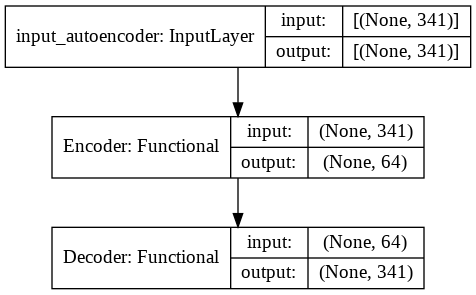

In [ ]:
plot_model(autoencoder, show_shapes=True)

In [ ]:
#autoencoder =load_model('identity_autoencoder_weights_3.h5') 
adam = Adam(lr=0.01)
autoencoder.compile(optimizer= adam, loss='mae')

In [ ]:
history = autoencoder.fit(train_datas.iloc[ :4000 ,:], train_datas.iloc[ :4000 ,:],
                          batch_size = 256, validation_split = 0.2, epochs= 100, verbose=1, callbacks=[es , lrr])

Epoch 1/100
13/13 [==============================] - 2s 80ms/step - loss: nan - val_loss: nan
Epoch 2/100
13/13 [==============================] - 0s 22ms/step - loss: nan - val_loss: nan
Epoch 3/100
13/13 [==============================] - 0s 23ms/step - loss: nan - val_loss: nan
Epoch 4/100
13/13 [==============================] - 0s 23ms/step - loss: nan - val_loss: nan
Epoch 5/100
13/13 [==============================] - 0s 32ms/step - loss: nan - val_loss: nan
Epoch 00005: early stopping


In [ ]:
autoencoder.save_weights('identity_autoencoder_weights_3.h5') 
autoencoder.save('identity_autoencoder_model_3.h5')  

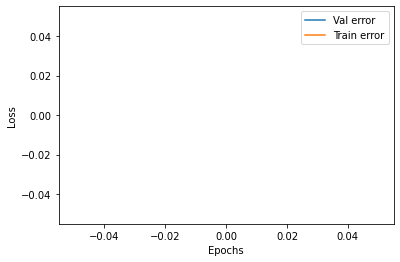

In [ ]:
val_loss = history.history['val_loss']
loss = history.history['loss']
plt.plot(val_loss)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Val error','Train error'], loc='upper right')
#plt.savefig('autoencoder_plot_error.png')
plt.show()

In [ ]:
input_model = Input(64,name = 'input_layer')

classifier = Dense(256, activation='relu')(input_model)   
classifier = Dense(256, activation='relu')(classifier)
classifier = Dense(256, activation='relu')(classifier)
classifier = Dense(128, activation='relu')(classifier)
classifier = Dense(128, activation='relu')(classifier)   
classifier = Dense(64, activation='relu')(classifier)
classifier = Dense(64, activation='relu')(classifier)
classifier = Dense(32, activation='relu')(classifier)
classifier = Dense(32, activation='relu')(classifier)   
classifier = Dense(16, activation='relu')(classifier)    
output = Dense(2, activation='softmax')(classifier)

classifier = Model(inputs= [input_model], outputs=[output])
classifier.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 64)]              0         
_________________________________________________________________
dense (Dense)                (None, 256)               16640     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256  

In [ ]:
#classifier =load_model('identity_classifier_model_3.h5') 
sgd = SGD(lr=0.01, momentum=0.9)
classifier.compile(optimizer=sgd, loss='mae' , metrics = ['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_loss',
                   mode='auto',
                   verbose=1,
                   patience=8)

lrr= ReduceLROnPlateau(monitor='val_loss',
                       factor=0.1, 
                       patience=2, 
                       min_lr=1e-10)

In [ ]:
latent_vector = Encoder.predict(train_transaction[:8000])
history = classifier.fit(latent_vector ,to_categorical(train_label[:8000]),
               batch_size = 128,
               validation_split = 0.2,
               epochs= 100,
               verbose=1,
               callbacks=[es , lrr]
               )

NameError: ignored

In [ ]:
classifier.save_weights('identity_classifier_weights_3.h5') 
classifier.save('identity_classifier_model_3.h5')   

In [ ]:
val_loss = history.history['val_loss']
loss = history.history['loss']

plt.plot(val_loss)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Val error','Train error'], loc='upper right')
#plt.savefig('classifier_plot_error.png')
plt.show()

In [ ]:
val_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']

plt.plot(val_accuracy)
plt.plot(accuracy)
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Val accuracy','Train accuracy'], loc='lower right')
plt.savefig( 'classifier_plot_accuracy.png')
plt.show()